In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.distributions.empirical_distribution import ECDF # Empirical CDF

# Cricket

In [2]:
sehwag = pd.read_csv("sehwag.csv")
dravid = pd.read_csv("dravid.csv")

In [3]:
sehwag

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13
0,1,5,2,0,0,50.00,7,lbw,1,NaN,v Pakistan,Mohali,1 Apr 1999,ODI # 1427
1,19,18,24,0,1,79.16,6,caught,1,NaN,v Zimbabwe,Rajkot,14 Dec 2000,ODI # 1660
2,58,62,54,8,0,107.40,6,bowled,1,NaN,v Australia,Bengaluru,25 Mar 2001,ODI # 1696
3,2,7,7,0,0,28.57,6,caught,2,NaN,v Zimbabwe,Bulawayo,27 Jun 2001,ODI # 1730
4,11,19,16,1,0,68.75,6,not out,2,NaN,v West Indies,Bulawayo,30 Jun 2001,ODI # 1731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,15,21,15,2,0,100.00,2,caught,1,NaN,v Sri Lanka,Hambantota,24 Jul 2012,ODI # 3292
241,3,6,6,0,0,50.00,2,caught,2,NaN,v Sri Lanka,Colombo (RPS),28 Jul 2012,ODI # 3293
242,34,46,29,6,0,117.24,2,caught,2,NaN,v Sri Lanka,Colombo (RPS),31 Jul 2012,ODI # 3294
243,4,20,11,1,0,36.36,2,bowled,1,NaN,v Pakistan,Chennai,30 Dec 2012,ODI # 3314


In [4]:
sehwag.shape

(245, 14)

In [5]:
sehwag["Runs"].describe()

count    245.000000
mean      33.767347
std       34.809419
min        0.000000
25%        8.000000
50%       23.000000
75%       46.000000
max      219.000000
Name: Runs, dtype: float64

In [6]:
p_25 = np.percentile(sehwag["Runs"], 25) # 25th percentile or Q1
p_25

8.0

In [7]:
p_50 = np.percentile(sehwag["Runs"], 50) # 50th percentile or Q2, "median"
p_50

23.0

In [8]:
p_75 = np.percentile(sehwag["Runs"], 75) # 75th percentile or Q3
p_75

46.0

In [9]:
iqr = p_75 - p_25 # Inter quartile range
iqr

38.0

<AxesSubplot:>

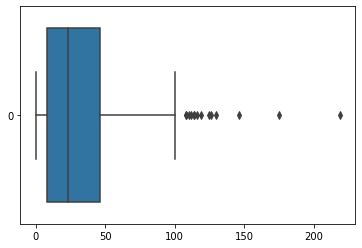

In [10]:
sns.boxplot(data=sehwag["Runs"], orient="h")

In [11]:
lower = max(p_25 - 1.5 * iqr, 0)
lower

0

In [12]:
upper = p_75 + 1.5 * iqr
upper

103.0

In [13]:
sehwag_outlier = sehwag[sehwag["Runs"] > upper]

In [14]:
len(sehwag_outlier)

14

In [15]:
14/245

0.05714285714285714

In [19]:
dravid["Runs"].describe()

count    318.000000
mean      34.242138
std       29.681822
min        0.000000
25%       10.000000
50%       26.000000
75%       54.000000
max      153.000000
Name: Runs, dtype: float64

In [20]:
p_25 = dravid["Runs"].quantile(0.25) # Q1 or p_25
p_50 = dravid["Runs"].quantile(0.5)  # Q2 or p_50 or median
p_75 = dravid["Runs"].quantile(0.75) # Q3 or p_75
print(p_25, p_50, p_75)

10.0 26.0 54.0


In [21]:
iqr = p_75 - p_25 
lower = max(p_25 - 1.5*iqr, 0)
upper = p_75 + 1.5*iqr
print(lower, upper)
print(iqr)

0 120.0
44.0


<AxesSubplot:>

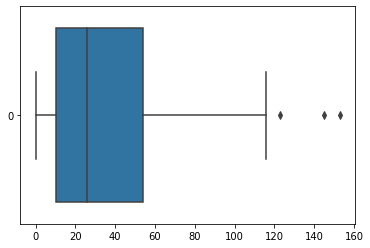

In [22]:
sns.boxplot(data=dravid["Runs"], orient="h")

In [23]:
dravid_outlier = dravid[dravid["Runs"] > upper]
len(dravid_outlier)

3

In [24]:
3/318

0.009433962264150943

In [25]:
data = pd.read_html("https://stats.espncricinfo.com/ci/engine/player/253802.html?class=1;template=results;type=batting;view=innings")

In [26]:
type(data)

list

In [27]:
len(data)

7

In [38]:
kohli = data[3]

In [39]:
kohli

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Unnamed: 9,Opposition,Ground,Start Date,Unnamed: 13
0,4,13,10,1,0,40.00,5,caught,1,NaN,v West Indies,Kingston,20 Jun 2011,Test # 1997
1,15,72,54,2,0,27.77,5,caught,3,NaN,v West Indies,Kingston,20 Jun 2011,Test # 1997
2,0,1,2,0,0,0.00,5,caught,1,NaN,v West Indies,Bridgetown,28 Jun 2011,Test # 1998
3,27,118,107,1,1,25.23,5,caught,3,NaN,v West Indies,Bridgetown,28 Jun 2011,Test # 1998
4,30,62,53,2,0,56.60,5,caught,2,NaN,v West Indies,Roseau,6 Jul 2011,Test # 1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,44,127,84,4,0,52.38,4,lbw,2,NaN,v Australia,Delhi,17 Feb 2023,Test # 2493
186,20,47,31,3,0,64.51,4,stumped,4,NaN,v Australia,Delhi,17 Feb 2023,Test # 2493
187,22,64,52,2,0,42.30,4,lbw,1,NaN,v Australia,Indore,1 Mar 2023,Test # 2496
188,13,35,26,2,0,50.00,4,lbw,3,NaN,v Australia,Indore,1 Mar 2023,Test # 2496


# Height

In [41]:
df_hw = pd.read_csv("weight-height.csv")
df_hw

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [42]:
df_hw["Height"].describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

In [44]:
df_height = df_hw["Height"]

In [45]:
min_height = df_height.min()
min_height

54.2631333250971

In [46]:
max_height = df_height.max()
max_height

78.9987423463896

In [47]:
total = len(df_height)

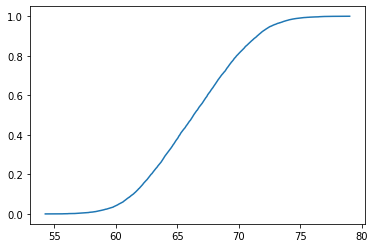

In [56]:
x_values = np.linspace(min_height, max_height, 1000)
y_values = []

for x in x_values:
    people_shorter_than_x = df_height[df_height <= x]
    num_people_shorter_than_x = len(people_shorter_than_x)
    frac_people_shorter_than_x = num_people_shorter_than_x / total
    y_values.append(frac_people_shorter_than_x)
plt.plot(x_values, y_values)
# e = ECDF(df_height) 
# plt.plot(e.x, e.y, c="r")

In [51]:
e = ECDF(df_height) # Empirical Cumulative Distribution Function (Empirical means from data)

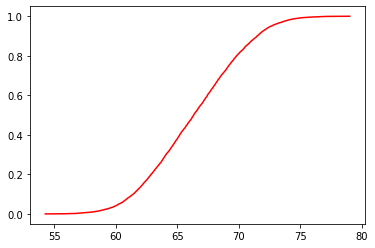

In [52]:
plt.plot(e.x, e.y, c="r")

CDF: F(x) = P(Height <= x)

In [49]:
df_height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<AxesSubplot:xlabel='Height', ylabel='Count'>

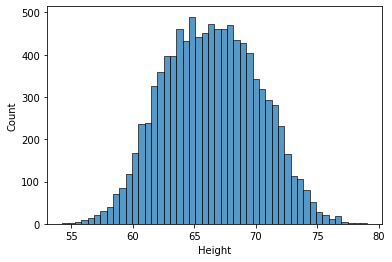

In [57]:
sns.histplot(df_height)